# **EMAIL SPAM DETECTION WITH MACHINE LEARNING**

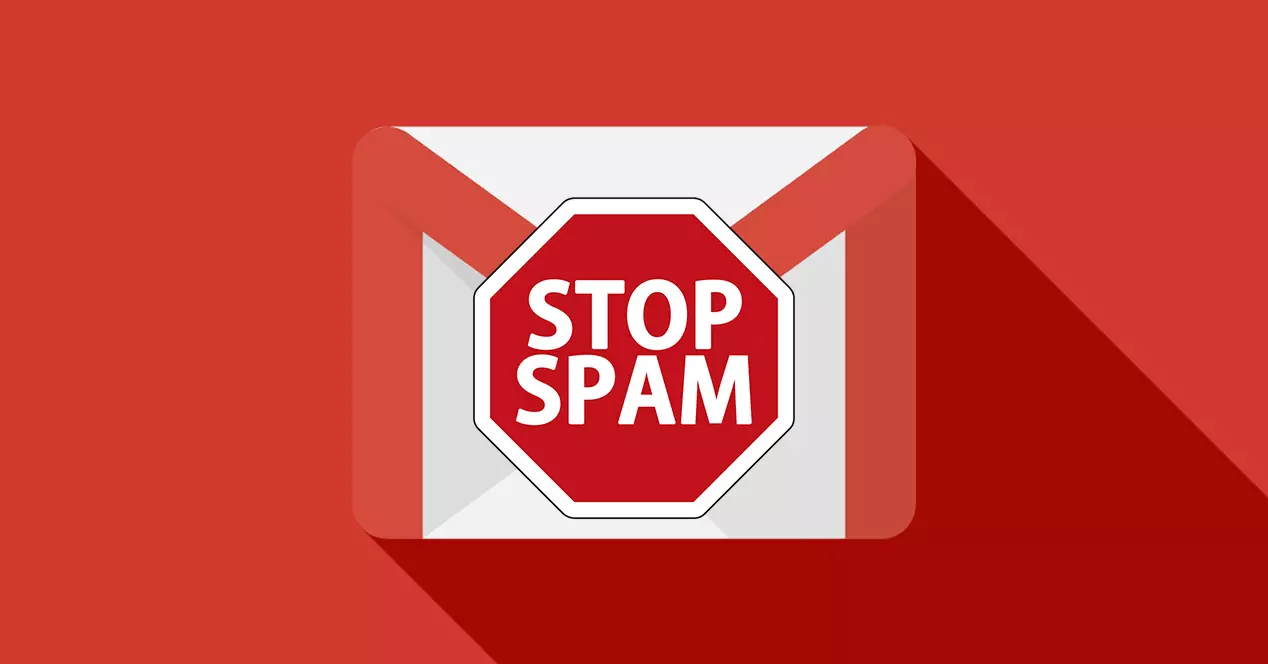



#Download **Dataset** here [EMAIL SPAM DETECTION](https://drive.google.com/file/d/19Yz5vBQ3T174xeSOOqVzw3rWWm39stsf/view?usp=share_link)

### Knowing about the Dataset

**Importing the Required Libraries**

In [1]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Reading informations in the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
spam = pd.read_csv("/content/remove_spam.csv", encoding='ISO-8859-1')

**Checking for null values in Data**

In [17]:
spam.isnull().sum()

,0
v1,0
v2,0


**Checking the First Five Values in the Data**

In [18]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Checking the Last Five Values in the Data**

In [19]:
spam.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ?_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


**Taking the required Columns in the Dataset**

In [20]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Dimensions of the Dataset**

In [21]:
spam.shape

(5572, 2)

**Checking for the classes in the Data**

In [22]:
spam.groupby('label').size()

,0
label,
ham,4684
spam,888


### Plotting

**Plotting the Label in the Dataset**

<Axes: xlabel='label'>

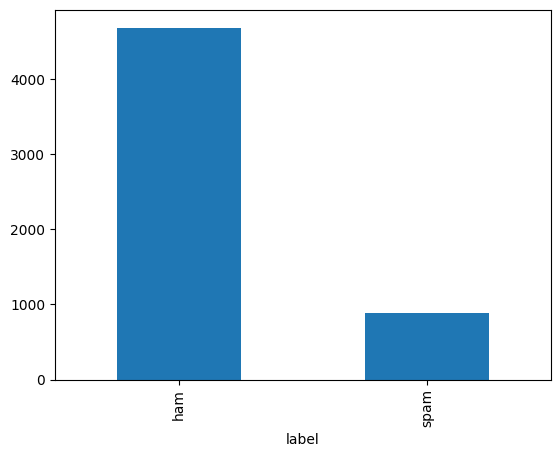

In [23]:
spam['label'].value_counts().plot(kind='bar')

### NLP

**Preprocessing the Text in the Dataset**

In [24]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

**Creating Bag of Words Model**

In [25]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

### Data Modeling

**Splitting the Dataset into Training and Testing Set**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

### Model Building

**Creating the Models**

In [27]:
# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

**Prediction**

In [28]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

### Model Testing

**Testing the Model**

In [29]:
# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

Random Forest Classifier
Confusion Matrix: 
[[935   6]
 [ 33 141]]
Accuracy:  0.9650224215246637
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[910  31]
 [ 34 140]]
Accuracy:  0.9417040358744395
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[926  15]
 [ 17 157]]
Accuracy:  0.9713004484304932


<Axes: >

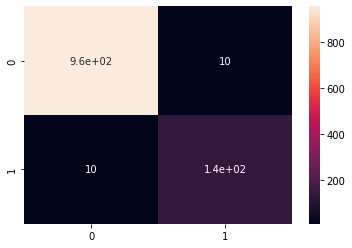

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)


In [ ]:
report1 = classification_report(Y_test, pred1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, pred2)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, pred3)
print("Classification Report for MNB \n", report3)

Classification Report for RFC 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for DTC 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.85      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for MNB 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.9

**Best Model is Multinomial Naïve Bayes**

### Saving Models

Saving all the Models

In [ ]:
filename = "RFC.pkl"
pickle.dump(model1, open(filename, 'wb'))
filename = "DTC.pkl"
pickle.dump(model2, open(filename, 'wb'))
filename = "MNB.pkl"
pickle.dump(model3, open(filename, 'wb'))
print("Saved all Models")

Saved all Models
